## Visuals

In [78]:
import pandas as pd
import numpy as np
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [79]:
db = pd.read_csv('clean_data_complete.csv')

In [80]:
db

,Caracter del procedimiento,Forma del procedimiento,Operador,Correo electronico,Entidad federativa,Tipo de contratacion,Articulo,Plantilla,Forma_Procedimiento_Presencial,Forma_Procedimiento_Electronica,...,Most_used_description_word_servici,Most_used_description_word_adquisicion,Most_used_description_word_material,Mes_pub,Dia_pub,Hora_pub,Min_pub,Most_used_UC_word_gyr,Most_used_UC_word_material,Most_used_UC_word_general
0,nacional,presencial,gabriel caamal caamal,cozumel,sur,obra publica,NaN,licitacion,1,0,...,0,0,0,8,10,12,49,0,0,0
1,nacional,presencial,gabriel caamal caamal,cozumel,sur,adquisiciones,NaN,licitacion,1,0,...,0,1,0,8,14,11,19,0,0,0
2,NaN,NaN,adriana ortega gonzalez,salamanca,bajio,servicios relacionados con la op,43,adjudicacion,0,0,...,0,0,0,3,20,12,35,0,0,1
3,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,26,0,0,0
4,nacional,mixta,paulino mata gonzalez,hotmail,NaN,obra publica,43,invitacion,0,0,...,0,0,0,6,8,10,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96117,nacional,mixta,maribel martinez lopez,semar,NaN,adquisiciones,42,adjudicacion,0,0,...,0,0,0,8,6,13,52,0,0,1
96118,nacional,presencial,timoteo sigala mercado,diconsa,norte,adquisiciones,41,adjudicacion,1,0,...,0,0,0,8,6,13,43,0,0,0
96119,nacional,presencial,ricardo gutierrez ramos,inifech,pacifico sur,obra publica,43,adjudicacion,1,0,...,0,0,0,8,6,13,32,0,0,0
96120,nacional,presencial,griselda rodriguez rojas,inpi,NaN,adquisiciones,41,adjudicacion,1,0,...,0,1,0,8,12,13,55,0,0,0


In [81]:
db.dtypes

Caracter del procedimiento                  object
Forma del procedimiento                     object
Operador                                    object
Correo electronico                          object
Entidad federativa                          object
Tipo de contratacion                        object
Articulo                                    object
Plantilla                                   object
Forma_Procedimiento_Presencial               int64
Forma_Procedimiento_Electronica              int64
Forma_Procedimiento_Mixta                    int64
Entidad_federativa_Norte                     int64
Entidad_federativa_Centro                    int64
Entidad_federativa_Golfo                     int64
Entidad_federativa_PacificoSur               int64
Entidad_federativa_Sur                       int64
Entidad_federativa_PacificoNorte             int64
Caracter del procedimiento_Nacional          int64
Caracter del procedimiento_Internacional     int64
Articulo de excepcion_41       

# Plot 1 - 1 item  

Target Class:  “Forma_Procedimiento_Electronica” == 1  
Complement Class :  “Forma_Procedimiento_Electronica” == 0  

{(Most_used_UC_word_gyr == '1')}

In [114]:
plantilla_most_common = db[['Forma del procedimiento','Most_used_UC_word_gyr']].dropna().groupby(['Forma del procedimiento']).agg(lambda x:x.value_counts()[1]/db['Most_used_UC_word_gyr'].value_counts()[1] *100)
plantilla_most_common = plantilla_most_common.reset_index().rename(columns={'Most_used_UC_word_gyr':'Percentage of Most_used_UC_word_gyr==1 in each Forma'})
plantilla_most_common

,Forma del procedimiento,Percentage of Most_used_UC_word_gyr==1 in each Forma
0,electronica,75.819098
1,mixta,6.485280
2,presencial,11.080534


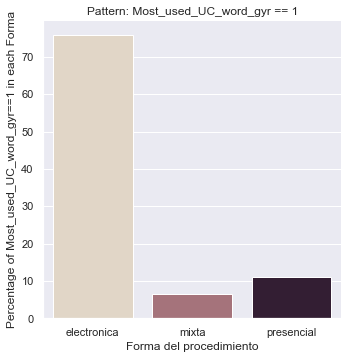

In [115]:
#Plotting 1 item
sns.set(rc={'figure.figsize':(20,11)})
pattern_title = 'Most_used_UC_word_gyr == 1'
target = 'Forma Procedimiento'
target_val = 'electronica'
chart = sns.catplot(
    data=plantilla_most_common,
    x='Forma del procedimiento',
    y='Percentage of Most_used_UC_word_gyr==1 in each Forma',
    palette="ch:.25",
    kind='bar'
    )
plt.title('Pattern: Most_used_UC_word_gyr == 1')
plt.show()

# Plot 1 - 2 item  

Class 0: “Plantilla ” != “Adjudicacion”  
Class 1: “Plantilla ” == “Adjudicacion”  
  
(Tipo_de_contratacion != 'obra publica') AND (Caracter_del_procedimiento != 'otro')


In [84]:
plantilla_most_common = db[['Caracter del procedimiento','Tipo de contratacion','Plantilla']].dropna().groupby(['Caracter del procedimiento','Tipo de contratacion']).agg(lambda x:x.value_counts().index[0])
plantilla_most_common = plantilla_most_common.reset_index().rename(columns={'Plantilla':'Most Common Plantilla'})
plantilla_most_common

,Caracter del procedimiento,Tipo de contratacion,Most Common Plantilla
0,internacional,adquisiciones,adjudicacion
1,internacional,arrendamientos,adjudicacion
2,internacional,obra publica,licitacion
3,internacional,servicios,adjudicacion
4,internacional,servicios relacionados con la op,adjudicacion
5,internacional abierto,adquisiciones,adjudicacion
6,internacional bajo tlc,adquisiciones,adjudicacion
7,internacional bajo tlc,arrendamientos,adjudicacion
8,internacional bajo tlc,obra publica,licitacion
9,internacional bajo tlc,servicios,adjudicacion


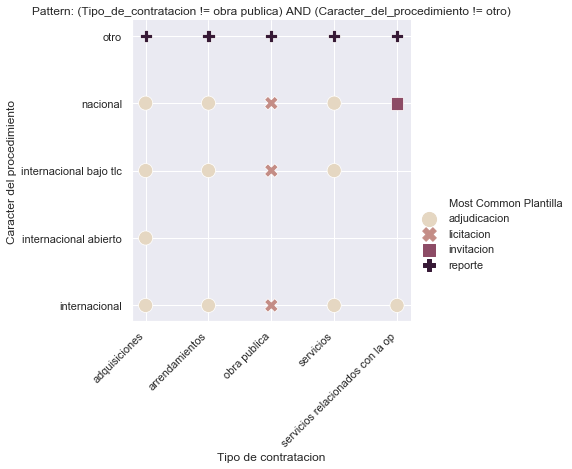

In [85]:
chart = sns.relplot(
    data=plantilla_most_common,
    x='Tipo de contratacion',
    palette="ch:.25",
    hue = 'Most Common Plantilla',
    style = 'Most Common Plantilla',
    size = 'Most Common Plantilla',
    y = 'Caracter del procedimiento',
    aspect = 1.3,
    height = 5,
    sizes = (150, 200),
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
#chart.set_yticklabels( rotation=-45, horizontalalignment='right')
plt.title('Pattern: (Tipo_de_contratacion != obra publica) AND (Caracter_del_procedimiento != otro)')
plt.savefig('Plot1-2-Michael.jpg', bbox_inches='tight')
plt.show()

# Plot 1 - 3 item  

Target Class:  “Forma_Procedimiento_Electronica” == 1  
Complement Class :  “Forma_Procedimiento_Electronica” == 0  

{(Most_used_UC_word_gyr == '1') AND (Tipo_de_contratacion != 'obra publica') AND (Operador != 'jose alfredo flores rodriguez')}

In [86]:
def cat_plot_variable(db, target, target_val, variables, pattern_title, pal="pastel"):
    sns.set(rc={'figure.figsize':(20,11)})
    tar_var = []
    res_var =[]
    for tar, val in variables:
        res_var.append(val)
        tar_var.append(tar)
    for element in range(len(tar_var)): 
        if len(db[tar_var[element]].value_counts()) > 5: 
            db[tar_var[element]][(db[tar_var[element]] != res_var[element])] = 'otro'
    if len(variables) == 1: 
        chart = sns.factorplot(
            data=db,
            x=target,
            kind = 'count',
            hue = tar_var[0],
            margin_titles  = True,
            ci = None, aspect = 2,
            palette=pal,
            edgecolor=".6"
            )
    elif len(variables) == 2: 
        chart = sns.factorplot(
        data=db,
        x=target,
        kind = 'count',
        hue = tar_var[0],
        col = tar_var[1],
        margin_titles  = True,
        ci = None, aspect = 1,
        palette=pal,
        edgecolor=".6"
        )
    elif len(variables) == 3: 
        chart = sns.factorplot(
        data=db,
        x=target,
        kind = 'count',
        hue = tar_var[0],
        col = tar_var[1],
        row = tar_var[2],
        margin_titles  = True,
        ci = None, aspect = 1,
        palette=pal,
        edgecolor=".6"
        )
    chart.set_xticklabels( rotation=45, horizontalalignment='right')
    (chart.set_axis_labels(target)
    .set_titles("{col_name} {col_var}")
    .despine(left=True))
    plt.subplots_adjust(top=0.9)
    chart.fig.suptitle(f'Pattern: {pattern_title}, \n Target: {target} = {target_val}')
    return plt.show()

In [87]:
db['Operador is jose'] = (db['Operador'] == 'jose alfredo flores rodriguez')

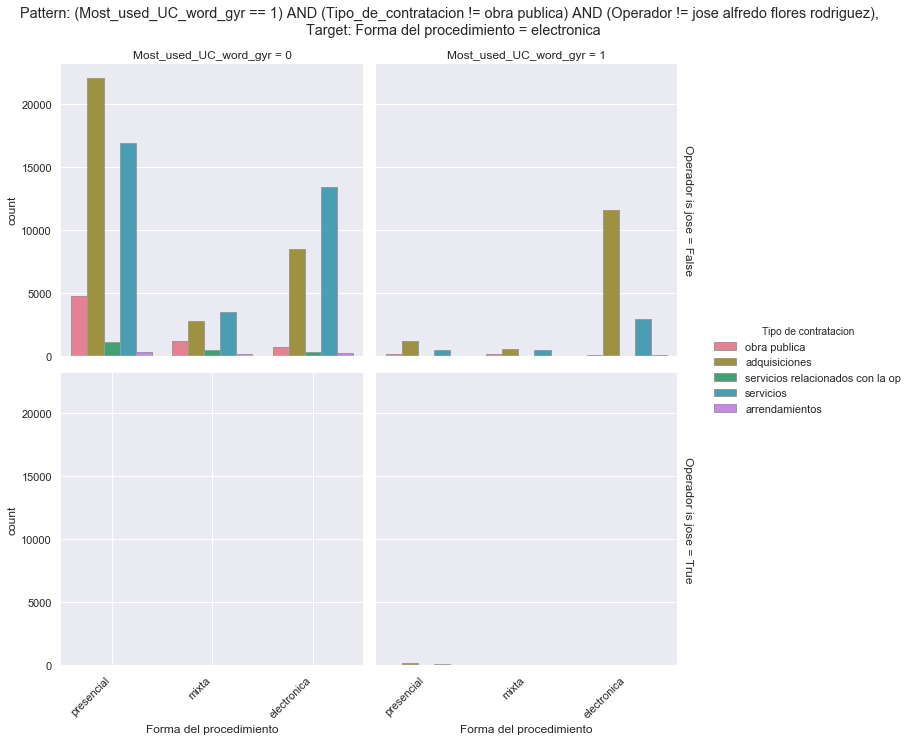

In [88]:
pattern_title = "(Most_used_UC_word_gyr == 1) AND (Tipo_de_contratacion != obra publica) AND (Operador != jose alfredo flores rodriguez)"
variables = [('Tipo de contratacion','obra publica'),('Most_used_UC_word_gyr','1') ,('Operador is jose','0')]
target = 'Forma del procedimiento'
target_val = 'electronica'
cat_plot_variable(db, target,  target_val, variables,  pattern_title, pal = 'husl')

# Plot 1 - 3 item  

Class 0: “Most_used_description_word_servici ” == 0  
Class 1: “Most_used_description_word_servici ” == 1 

(Tipo_de_contratacion == 'servicios') AND (Mes_pub <= 6) AND (Forma_del_procedimiento == 'presencial')

In [89]:
db['Mes_pub'].describe()

count    96122.000000
mean         4.492655
std          2.271442
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max          9.000000
Name: Mes_pub, dtype: float64

In [90]:
db['Mes_pub'] = db['Mes_pub'].astype(str)

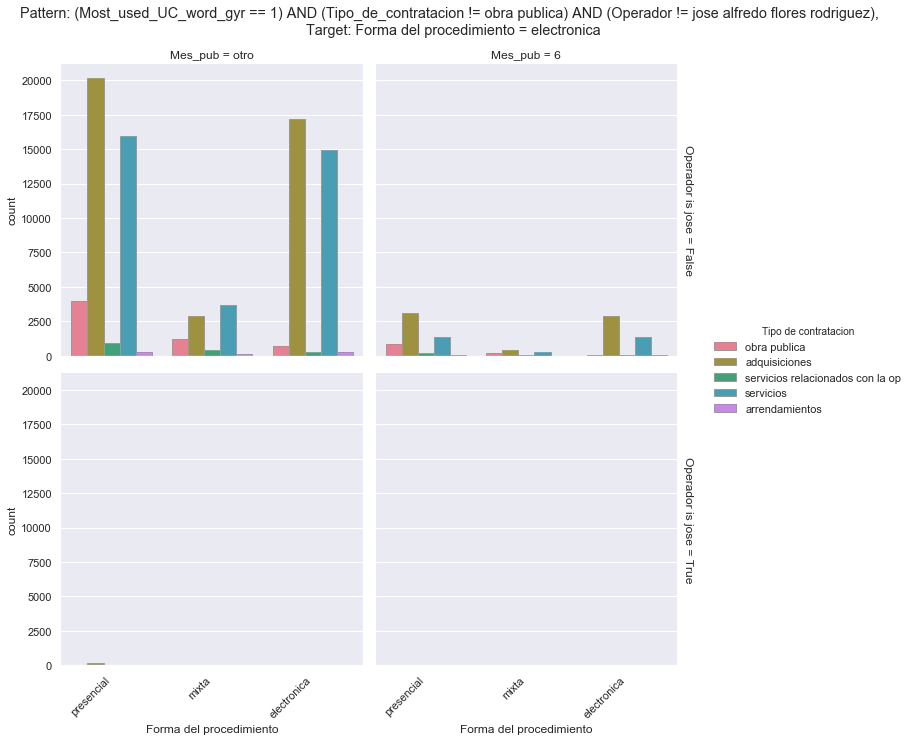

In [73]:
pattern_title = "(Most_used_UC_word_gyr == 1) AND (Tipo_de_contratacion != obra publica) AND (Operador != jose alfredo flores rodriguez)"
variables = [('Tipo de contratacion','obra publica'),('Mes_pub','6') ,('Operador is jose','0')]
target = 'Forma del procedimiento'
target_val = 'electronica'
cat_plot_variable(db, target,  target_val, variables,  pattern_title, pal = 'husl')

In [93]:
db['Tipo de contratacion'][(db['Tipo de contratacion'] != 'servicios')] = 'otro'

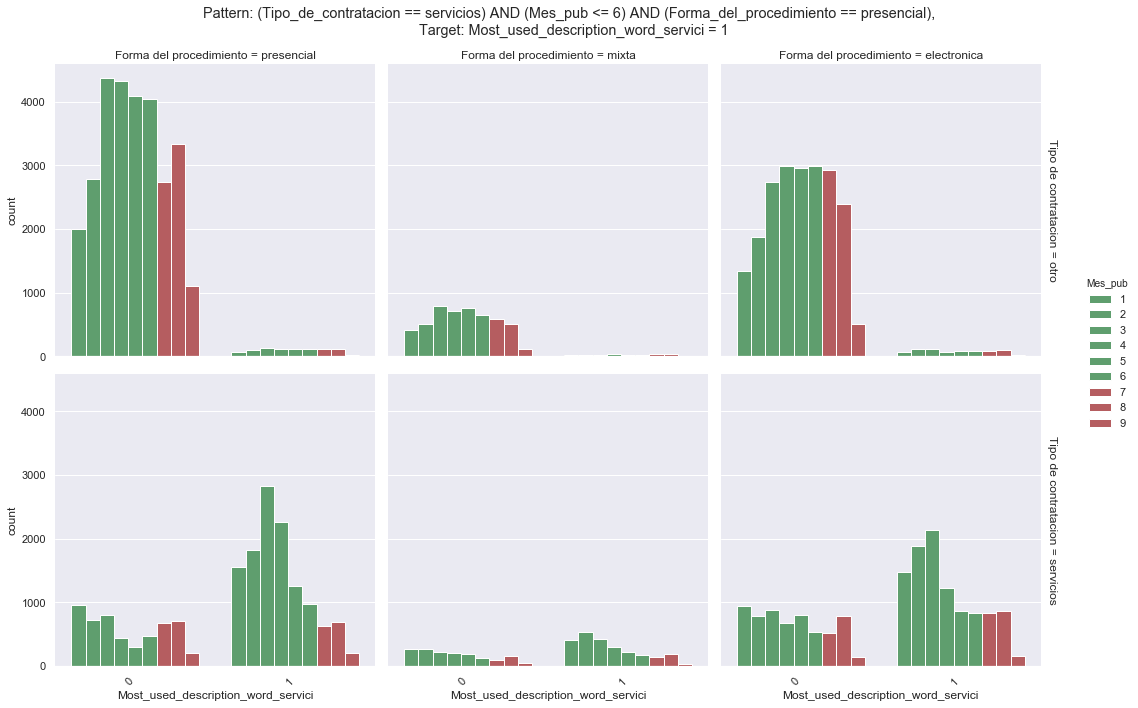

In [98]:
#Plotting 1 item
sns.set(rc={'figure.figsize':(20,11)})
pattern_title = "(Tipo_de_contratacion == servicios) AND (Mes_pub <= 6) AND (Forma_del_procedimiento == presencial)"
target = 'Most_used_description_word_servici'
target_val = '1'
chart = sns.catplot(
    data=db,
    x='Most_used_description_word_servici',
    row='Tipo de contratacion',
    col='Forma del procedimiento',
    margin_titles  = True,
    hue='Mes_pub',
    palette=['g','g','g','g','g','g','r','r','r'],
    kind='count'
    )
chart.set_xticklabels( rotation=45, horizontalalignment='right')
(chart.set_axis_labels(target)
.set_titles("{col_name} {col_var}")
.despine(left=True))
plt.subplots_adjust(top=0.9)
chart.fig.suptitle(f'Pattern: {pattern_title}, \n Target: {target} = {target_val}')
plt.show()